<a href="https://colab.research.google.com/github/jaimeromeroviana/Ipynbs-Colab/blob/main/Data_exploration_and_visualization_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this workshop we are goin to work with the dataset of the UPM researchers and their publications. This dataset is composed by two files. These files are an extended versión of the csv that we used in the web application workshops.

Our goal is obtain as much information as we can from this dataset. We will achieve this in two ways: we will answer questions with numeric values (e.g. what is the average number publications of an UPM reaearcher? or, how many citations have the reseachers, suming all their publications?) or we will generate some charts to present information in a visual way (e.g. how is the relation between the publication year of a paper and its number of citations? or, how is the histogram of the number of publications by researcher?)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
publications = pd.read_json("data/publications.json")
publications.date = pd.to_datetime(publications.date*1e6)
researchers = pd.read_json("data/researchers.json")

# Dataset exploration
Any project related with data analysis starts with a study of the data itself: 
* What kind of data do we have?
* How is it organized? How many columns have each dataframe?
* Are there wrong or missing values?
* What does each value of a column means? How many different values are in each column?

With the examples we saw in the previous workshop try to answer that questions.

In [ ]:
researchers.name.describe()

count       7170
unique      2828
top       Javier
freq         131
Name: name, dtype: object

In [ ]:
researchers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7175 entries, 0 to 7174
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   auth_id       7175 non-null   int64  
 1   name          7170 non-null   object 
 2   last_name     7175 non-null   object 
 3   citations     7174 non-null   float64
 4   cited_by      7175 non-null   float64
 5   publications  7173 non-null   float64
 6   orcid         616 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 448.4+ KB


In [ ]:
publications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35964 entries, 0 to 35963
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pages        29764 non-null  float64       
 1   authors      35949 non-null  object        
 2   title        35953 non-null  object        
 3   document_id  35964 non-null  object        
 4   date         35952 non-null  datetime64[ns]
 5   journal      35768 non-null  object        
 6   openaccess   35964 non-null  bool          
 7   cited_count  35955 non-null  float64       
 8   type         35955 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(5)
memory usage: 2.5+ MB


In [ ]:
researchers.describe()

,auth_id,citations,cited_by,publications
count,7.175000e+03,7174.000000,7175.000000,7173.000000
mean,4.233308e+10,100.549902,78.590430,8.809703
std,2.045068e+10,406.214383,292.216692,20.705277
min,6.503849e+09,-10.000000,0.000000,0.000000
25%,2.407418e+10,1.000000,1.000000,1.000000
50%,5.625455e+10,7.000000,6.000000,2.000000
75%,5.719483e+10,42.000000,37.000000,7.000000
max,5.720871e+10,9830.000000,6761.000000,343.000000


In [ ]:
publications.date.describe()

count                   35952
unique                   4154
top       2014-01-01 00:00:00
freq                     1622
first     1959-01-01 00:00:00
last      2077-12-31 00:00:00
Name: date, dtype: object

In [ ]:
publications.pages.describe()

count    2.976400e+04
mean     7.681272e+02
std      1.177253e+05
min     -1.255000e+07
25%      6.000000e+00
50%      9.000000e+00
75%      1.300000e+01
max      1.296919e+07
Name: pages, dtype: float64

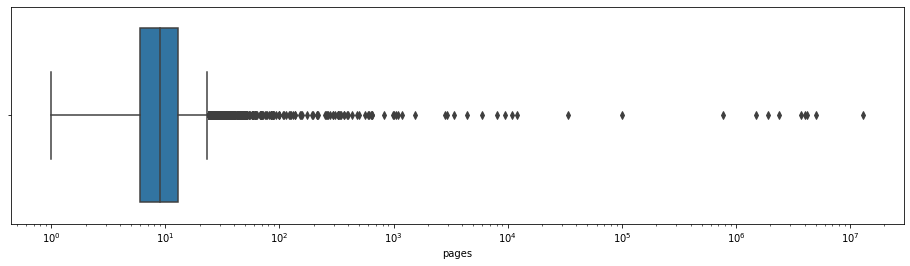

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(data=publications, x="pages",ax=ax)
ax.set_xscale("log")

# Data cleaning
After a first view of the data and before to start working with it, we must clean it. This proccess is called preprocessing and it is crucial to be able to obtain good results. We will discard invalid data, fill missing values, drop redundant information, etc. We need to create a dataset with the following restrictions.
* All reserachers should have name, last_name and auth_id. All publications should have title, journal and document_id. Drop the rows that do not match this condition (check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
* There are no duplicated publications (same title) or researchers (same name and lastname). To find duplicates check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
* All numeric fields must be an integer number bigger or equal to 0. Replace missing values with 0, round decimal values
* For the rest of the fields, rows that contain incorrect values should be discarded

In [ ]:
# drop null values
researchers = researchers.dropna(subset=["name","last_name","auth_id"])
publications = publications.dropna(subset=["title","journal","document_id","authors"])

In [ ]:
# discard duplicates
researchers = researchers.drop_duplicates(subset=["name","last_name"])
publications = publications.drop_duplicates(subset=["title"])

In [ ]:
# replace null values in numerics columns with zeros
researchers.citations = researchers.citations.fillna(0)
researchers.cited_by = researchers.cited_by.fillna(0)
researchers.publications = researchers.publications.fillna(0)

publications.pages = publications.pages.fillna(0)
publications.cited_count = publications.cited_count.fillna(0)

In [ ]:
# drop values <0
researchers = researchers[(researchers.citations >= 0) & (researchers.cited_by >= 0) & (researchers.publications >= 0)]
publications = publications[(publications.pages >= 0) & (publications.cited_count >= 0)]

In [ ]:
# format numbers
import numpy as np
def to_int(x):
    return np.round(x)

researchers.citations = researchers.citations.apply(to_int)
researchers.cited_by = researchers.cited_by.apply(to_int)
researchers.publications = researchers.publications.apply(to_int)

publications.pages = publications.pages.apply(to_int)
publications.cited_count = publications.cited_count.apply(to_int)

In [ ]:
# wrong values
publications = publications[publications.date.dt.year<=2020]
publications = publications[publications.pages>0]
publications = publications[publications.pages<100]

# Data analytics

Once we know about the data we are using and we have cleaned it, we need to ask what kind of useful information we can extract from that data. It is a good idea to make a kind of brainstorming of possible questions, then take the list of resulting questions and sort them by their difficulty, finally begin to answer them starting by the easiest ones.

Yoy may need to use a joined dataset to answer some questions

In [ ]:
# This operation creates a dataset combining researchers and publications producing a dataset with one row for each
# combination of researcher-publication in which the researcher is one of the authors of the publication
data = researchers.merge(publications.rename(columns={"authors":"auth_id"}).explode("auth_id"), on="auth_id")

## Basic results

Some of the esaiest question or more basic results we can obtain are the following:
* Numeric results
    * How many researchers are?
    * How many publications are?
    * How many of journals are?
    * How many types of publications are?
    * How many publications of each type are?
    * How many publications have each researcher in average? (Use only researchers dataset)
    * Which is the oldest publication?
    * Which is the publication with most citations?
    * Who is the researcher with more publications? (Use only researchers dataset)
    * How many researchers have ORCid?
* Graphic results
    * Histogram of the number of publications per researcher
    * Bar chart of the number of publications by type
    * Line chart of the number of publications per year

Som of those questions are just countings, sumations or rankings, but other need data aggregations with ``groupby``.

**Answer each question in a different cell of this notebook (remember that you can insert new cell from the Insert menu).**

In [ ]:
# How many researchers are?
print("There are {} researchers".format(len(researchers)))

There are 7056 researchers


In [ ]:
# How many publications are?
print("There are {} publications".format(len(publications)))

There are 29178 publications


In [ ]:
# How many journals are?
print("There are {} different journals".format(len(publications.journal.unique())))

There are 6746 different journals


In [ ]:
# How many types of publications are?
print("There are {} types of publications".format(len(publications.type.unique())))

There are 12 types of publications


In [ ]:
# How many publications of each type are?
publications.groupby("type")["document_id"].count()

type
Article             18763
Article in Press       12
Book                   17
Chapter               644
Conference Paper     8817
Editorial              93
Erratum                 9
Letter                 47
Note                   66
Review                675
Short Survey           28
Name: document_id, dtype: int64

In [ ]:
# How many publications have each researcher in average? (Use only researchers dataset)
print("Each researcher has {:.2} publications in average".format(researchers.publications.mean()))

Each researcher has 8.9 publications in average


In [ ]:
# Which is the oldest publication?
publications[publications.date == publications.date.min()]

,pages,authors,title,document_id,date,journal,openaccess,cited_count,type
33538,16.0,"[24580537700, 6504371460, 55463179200]",Study of the impedance of a platinum electrode...,26744475991,1959-01-01,Electrochimica Acta,False,28.0,Article


In [ ]:
# Which is the publication with most citations?
publications[publications.cited_count == publications.cited_count.max()]

,pages,authors,title,document_id,date,journal,openaccess,cited_count,type
2152,11.0,"[6507925214, 6701794860, 7004720416]",A review of feature selection techniques in bi...,35748932917,2007-10-01,Bioinformatics,True,2406.0,Review


In [ ]:
# Who is the researcher with more publications? (Use only researchers dataset)
researchers[researchers.publications == researchers.publications.max()]

,auth_id,name,last_name,citations,cited_by,publications,orcid
0,7005227142,José Antonio,Cobos,5267.0,3940.0,343.0,None


In [ ]:
# How many researchers have ORCid?
researchers[researchers.orcid.notna()]

,auth_id,name,last_name,citations,cited_by,publications,orcid
4,8899577600,Javier,Bajo,2213.0,1376.0,271.0,0000-0003-0824-4133
6,7003699673,Juan C.,Minano,3068.0,1799.0,243.0,0000-0003-2281-0728
10,14010357000,Óscar,Corcho,3793.0,3199.0,217.0,0000-0002-9260-0753
14,7005864666,Alexander N.,Pisarchik,2529.0,1450.0,195.0,0000-0003-2471-2507
16,24722967900,Andres,Santos,3070.0,2706.0,190.0,0000-0001-7423-9135
...,...,...,...,...,...,...,...
6576,57195055730,Ely Dannier,Valbuena-Niño,0.0,0.0,1.0,0000-0003-4154-7179
6617,57205462726,M.,Pena,0.0,0.0,1.0,0000-0002-7362-2586
6697,34769551000,C. E.,García,1.0,1.0,2.0,0000-0002-8282-0234
6897,57170378400,Angel Y.,Hernan,1.0,1.0,1.0,0000-0002-3290-9433


(0.0, 120.0)

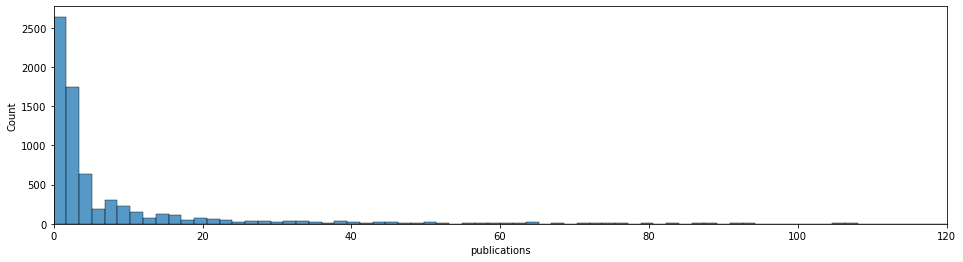

In [ ]:
# Histogram of the number of publications per researcher
fig, ax = plt.subplots(figsize=(16,4))
sns.histplot(data=researchers, x="publications", bins=200, ax=ax)
ax.set_xlim(0, 120)

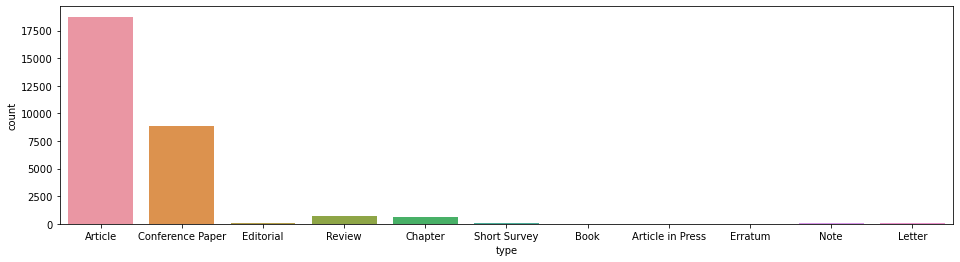

In [ ]:
# Bar chart of the number of publications by type
fig, ax = plt.subplots(figsize=(16,4))
sns.countplot(data=publications, x="type", ax=ax)

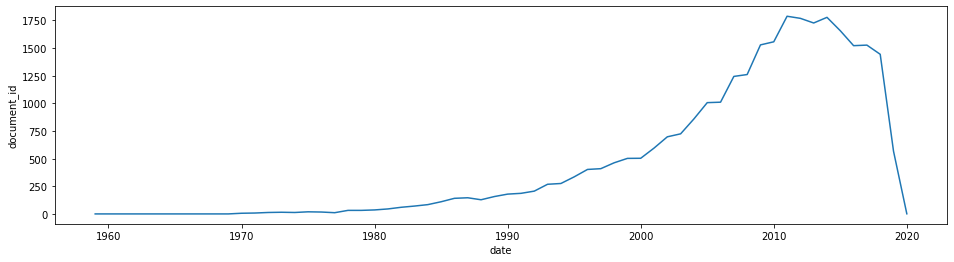

In [ ]:
# Line chart of the number of publications per year
fig, ax = plt.subplots(figsize=(16,4))
publication_year = publications.groupby(publications.date.dt.year)[["document_id"]].count()
sns.lineplot(data=publication_year, x="date", y="document_id", ax=ax)

# Intermediate results

* Numeric results
    * How many publications of each researcher are in the data? Is this the same number than the column ``document-count``?
    * How many authors have each publication?
    * What is the average number of authors in a publication?
    * What is the average number of pages in a publication depending of the publication type?
    * What is the average number of citations in a publication depending of the publication type?
    * How many years each researcher have been active? (difference between the publicationDate of the oldest and newest publications)
* Graphic results
    * Histogram of the number of researchers by the number of active years
    * Histogram of the number of authors in a publication
    * Scatter plot of the publication year vs the number of citations
    * Chart of the average number of citations depending on the publication type
    * Chart of the average number of pages depending on the publication type


In [ ]:
# How many publications of each researcher are in the data? Is this the same number than the column document-count?
data.groupby("auth_id")[["document_id"]].count()

,document_id
auth_id,
6503848928,2
6503890565,3
6503896634,5
6503903714,1
6503939551,1
...,...
57208597828,1
57208599115,1
57208639475,1


In [ ]:
researchers.sort_values(by="auth_id")[["auth_id","publications"]]

,auth_id,publications
3435,6503848928,2.0
2346,6503890565,4.0
1874,6503896634,6.0
6043,6503903714,1.0
6754,6503908970,0.0
...,...,...
6820,57208685753,1.0
6579,57208701829,1.0
6837,57208702302,1.0
6407,57208702888,2.0


In [ ]:
# How many authors have each publication?
publications["nauthors"] = publications.authors.apply(len)
publications

,pages,authors,title,document_id,date,journal,openaccess,cited_count,type,nauthors
0,15.0,"[57204955584, 57200520067, 24922369500, 244382...",High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0.0,Article,8
1,8.0,"[7005227142, 57200519327, 57200511770, 2443825...",Energy-Buffered Single-Phase Inverter Operatin...,85060314395,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,2.0,Conference Paper,5
2,8.0,"[57200511770, 57200519327, 56249124100, 244382...",ZVS transitions in Multi-Mode Single Stage Inv...,85060302761,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1.0,Conference Paper,5
3,5.0,"[57195619519, 57204116610, 24438258500, 700522...",Equivalent Parameters of Round and Litz Wire C...,85060302746,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,0.0,Conference Paper,5
4,6.0,"[57200519327, 57200511770, 24438258500, 562491...",Digital Variable Frequency Control of a Single...,85060299891,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1.0,Conference Paper,5
...,...,...,...,...,...,...,...,...,...,...
35958,21.0,"[16319177900, 25638973000, 57195326886]",Micro-manufacturing technologies for biodevice...,85027116848,2013-01-01,Handbook on Advanced Design and Manufacturing ...,False,1.0,Chapter,3
35960,13.0,"[57195323836, 57195323776, 57195321188, 571900...",Predictive value of serum infliximab levels at...,85027118255,2017-06-01,Open Rheumatology Journal,True,3.0,Article,15
35961,10.0,"[57206889833, 57195310042]",The [textile] materiality of jorn utzon's encl...,85062100903,2018-11-01,Rita Revista Indexada de Textos Academicos,True,0.0,Article,2
35962,8.0,"[57195305282, 57195310042]",Ernesto N. Rogers and the preesistenza ambient...,85026897732,2015-04-01,Rita Revista Indexada de Textos Academicos,True,0.0,Article,2


In [ ]:
# What is the average number of authors in a publication?
publications.nauthors.mean()

4.916272534101035

In [ ]:
# What is the average number of pages in a publication depending of the publication type?
publications.groupby("type")["pages"].mean()

type
Article             11.217449
Article in Press    15.250000
Book                20.294118
Chapter             19.793478
Conference Paper     7.543836
Editorial            3.204301
Erratum              2.333333
Letter               3.765957
Note                 5.863636
Review              14.623704
Short Survey         5.285714
Name: pages, dtype: float64

In [ ]:
# What is the average number of citations in a publication depending of the publication type?
publications.groupby("type")["cited_count"].mean()

type
Article             18.254224
Article in Press     1.333333
Book                 3.000000
Chapter              3.006211
Conference Paper     5.205966
Editorial            3.526882
Erratum              1.666667
Letter              12.808511
Note                 5.590909
Review              37.927407
Short Survey        14.821429
Name: cited_count, dtype: float64

In [ ]:
# How many years each researcher have been active? (difference between the publicationDate of the oldest and newest publications)
max_date = data.groupby("auth_id")["date"].max()
min_date = data.groupby("auth_id")["date"].min()
active = ((max_date-min_date).dt.total_seconds()/(3600*24*365)).reset_index().rename(columns={"date":"active_years"})
researchers = researchers.merge(active)
researchers

,auth_id,name,last_name,citations,cited_by,publications,orcid,active_years
0,7005227142,José Antonio,Cobos,5267.0,3940.0,343.0,None,27.684932
1,55708653400,Javier,LLorca,9830.0,6350.0,301.0,None,32.389041
2,7007057622,Manuel,Elices,8251.0,4563.0,285.0,None,42.775342
3,6701646524,Marcela G.,González-Gross,7167.0,5244.0,280.0,None,28.553425
4,8899577600,Javier,Bajo,2213.0,1376.0,271.0,0000-0003-0824-4133,13.556164
...,...,...,...,...,...,...,...,...
5375,56619838600,G.,Ignacio,0.0,0.0,1.0,None,0.000000
5376,57201215949,A.,Toribio,8.0,8.0,1.0,None,0.000000
5377,57190576447,Noemi García,Arjona,1.0,1.0,1.0,None,0.000000
5378,57202283310,Victor,Aparicio Mequiades,1.0,1.0,1.0,None,0.000000


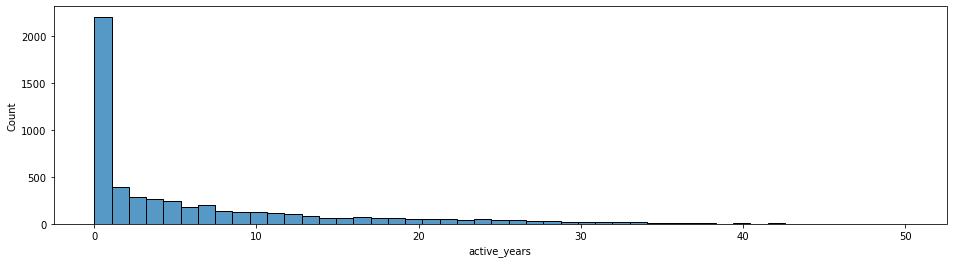

In [ ]:
# Histogram of the number of researchers by the number of active years
fig, ax = plt.subplots(figsize=(16,4))
sns.histplot(data=researchers, x="active_years", ax=ax)

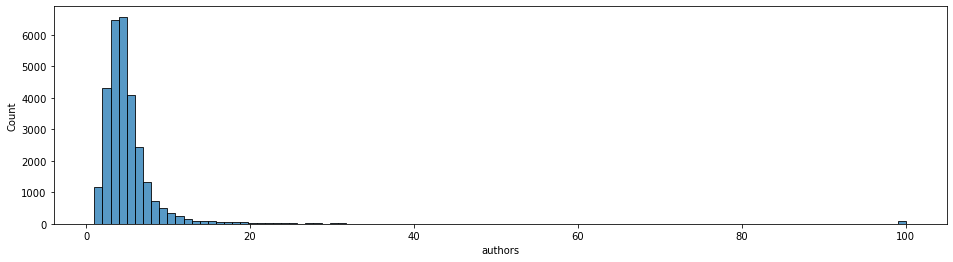

In [ ]:
# Histogram of the number of authors in a publication
fig, ax = plt.subplots(figsize=(16,4))
sns.histplot(data=publications, x=publications.authors.apply(len), bins=100, ax=ax)

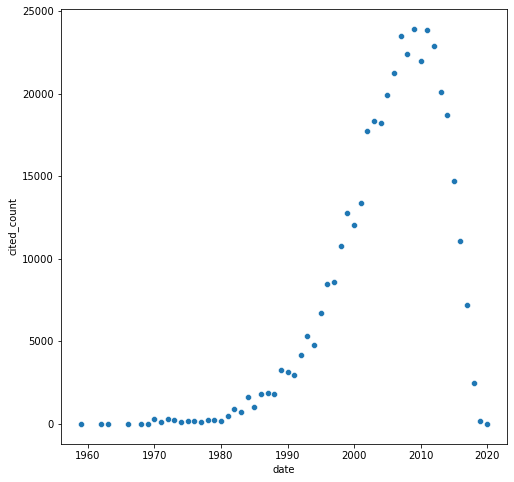

In [ ]:
# Scatter plot of the publication year vs the number of citations
fig, ax = plt.subplots(figsize=(8,8))
year_citations = publications.groupby(publications.date.dt.year)["cited_count"].sum().reset_index()
sns.scatterplot(data=year_citations, x="date", y="cited_count")

<BarContainer object of 11 artists>

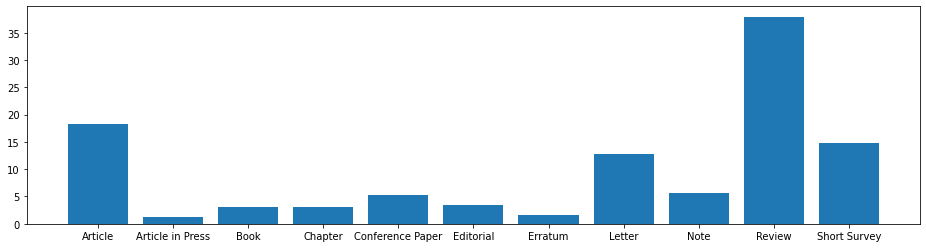

In [ ]:
# Chart of the average number of citations depending on the publication type
fig, ax = plt.subplots(figsize=(16,4))
type_citations = publications.groupby("type")["cited_count"].mean().reset_index()
ax.bar(type_citations.type, type_citations.cited_count)

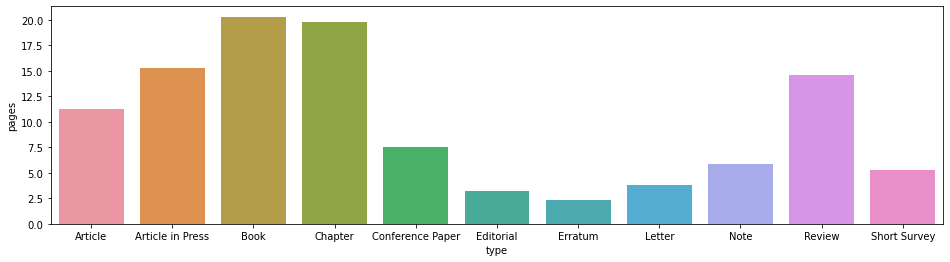

In [ ]:
# Chart of the average number of pages depending on the publication type
fig, ax = plt.subplots(figsize=(16,4))
type_pages = publications.groupby("type")["pages"].mean().reset_index()
sns.barplot(data=type_pages, x="type", y="pages", ax=ax)

## Advanced results

* Title Analysis
    * What are the most repeated words in the publication titles?
    * Plot the distribution of the number of words in the titles

* Coauthor: 
    One researcher is coatuhor with other if both appears as author in at least one publication. 
    * What is the average number of different coauthors of each researcher?
    * How is the most frequent coauthor (their id) of each researcher?


* H-index: 
    The h-index (https://en.wikipedia.org/wiki/H-index) is a metric that tries to describe the impact of a researcher based on the number of citations received in each publication. A researcher has a h-index of `n` if she has at least `n` publications with `n` or more citations.

    * What is the h-index of each researcher?
    * Chart of the publications and number of citations of a certain researcher, highlinting (in a different color) which publications contributed to the h-index

![alt text](img/h-index.svg "H-Index")


of              21076
and             11217
in              10881
the              9917
for              8033
a                4680
on               3844
to               3642
A                3474
with             2812
by               1876
using            1597
The              1569
analysis         1317
from             1280
based            1209
system           1142
model            1022
an               1010
systems           993
study             992
An                932
approach          707
at                677
as                656
design            631
control           625
data              590
method            575
properties        525
new               502
networks          492
models            472
power             465
Analysis          463
On                462
performance       458
management        449
between           445
under             441
energy            430
Spain             425
applications      420
through           409
high              407
case      

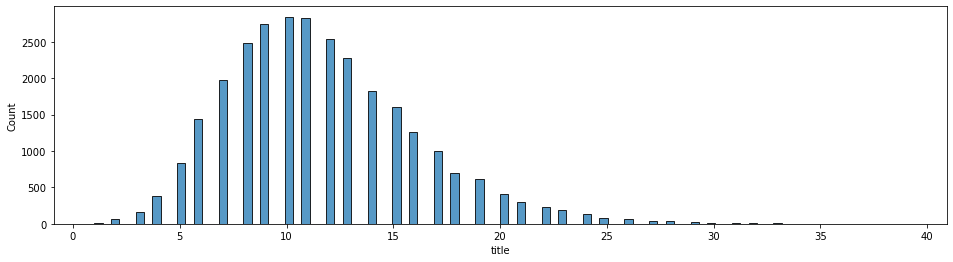

In [ ]:
# Title Analysis
print(publications.title.apply(lambda x: x.split(" ")).explode().value_counts().iloc[:50])

fig, ax = plt.subplots(figsize=(16,4))
sns.histplot(data=publications, x=publications.title.apply(lambda x: len(x.split(" "))), ax=ax)

In [ ]:
publications.title.apply(lambda x: len(x.split(" "))).explode()

0        15
1        11
2         7
3        23
4        13
         ..
35958     9
35960    13
35961     7
35962    14
35963    10
Name: title, Length: 29178, dtype: int64

In [ ]:
# Coauthor
publications["authors2"] = publications.authors
data2 = researchers.merge(publications.rename(columns={"authors2":"auth_id"}).explode("auth_id"), on="auth_id")
def coauthorCount(x):
    coauths = {}
    for i in x:
        if i in coauths:
            coauths[i] += 1
        else:
            coauths[i] = 0
    return coauths

data2.groupby("auth_id")["authors"].sum().apply(lambda x: len(coauthorCount(x))-1)

auth_id
6503848928     4
6503890565     5
6503896634     7
6503903714     3
6503939551     4
              ..
57208597828    4
57208599115    5
57208639475    6
57208670663    4
57208701829    3
Name: authors, Length: 5380, dtype: int64

In [ ]:
# What is the most frequent coauthor (their id) of each researcher?
def getMax(x):
    key = ""
    value = -1
    for i in x:
        if x[i] > value:
            value = x[i]
            key = i
    return i
data2.groupby("auth_id")["authors"].sum().apply(lambda x: getMax(coauthorCount(x)))

auth_id
6503848928      6507041750
6503890565      8669447500
6503896634      7004870821
6503903714      6602840811
6503939551      7202945116
                  ...     
57208597828    55883782400
57208599115    57207736939
57208639475    23107265900
57208670663    55994487100
57208701829    57195692330
Name: authors, Length: 5380, dtype: int64

In [ ]:
# H-index
def hindex(x):
    x.sort()
    for i in range(len(x),0,-1):
        if x[len(x)-i] >= i:
            return i
    return 0        
data.groupby("auth_id")["cited_count"].apply(lambda x: hindex(list(x)))

auth_id
6503848928     0
6503890565     1
6503896634     5
6503903714     1
6503939551     1
              ..
57208597828    0
57208599115    0
57208639475    0
57208670663    0
57208701829    0
Name: cited_count, Length: 5380, dtype: int64

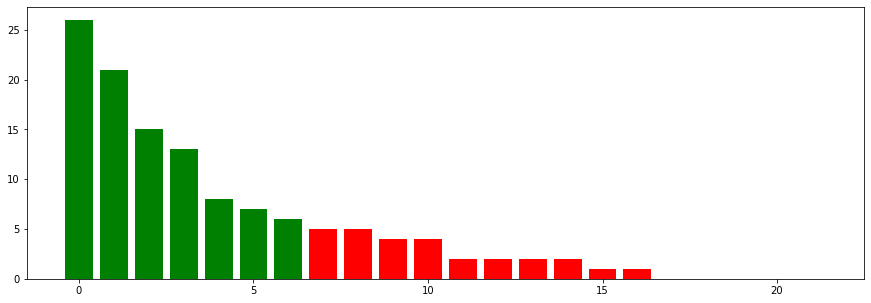

In [ ]:
# Chart of the publications and number of citations of a certain researcher
researcher_id = 24521864600
citations = data[data["auth_id"]==researcher_id]["cited_count"].sort_values(ascending=False).values
h = hindex(list(citations))

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(range(len(citations[citations>=h])),citations[citations>=h],color="green")
ax.bar(range(len(citations[citations>=h]), len(citations)),citations[citations<h],color="red")
plt.show(fig)